In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [10]:
!unzip Tree_Species.zip -d extracted_data/

Archive:  Tree_Species.zip
replace extracted_data/Tree_Species_Dataset/.git/HEAD? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: extracted_data/Tree_Species_Dataset/.git/HEAD  
  inflating: extracted_data/Tree_Species_Dataset/.git/config  
  inflating: extracted_data/Tree_Species_Dataset/.git/description  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/applypatch-msg.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/commit-msg.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/fsmonitor-watchman.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/post-update.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-applypatch.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-commit.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-merge-commit.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-push.sample  
  inflating: extracted_da

In [11]:
data_dir = '/content/drive/MyDrive/Datasets/extracted_data/Tree_Species_Dataset'

In [12]:
print(data_dir)

/content/drive/MyDrive/Datasets/extracted_data/Tree_Species_Dataset


In [13]:
import os
print("class folder:")
print(os.listdir(data_dir))

class folder:
['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [14]:
import os
from PIL import Image

corrupt_images = []

# Code to identify corrupted images (originally in cell 0U1zFP43gU2u)
for class_name in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = Image.open(img_path)
                img.verify()
            except Exception as e:
                corrupt_images.append(img_path)

print("Corrupted images identified:", len(corrupt_images))


# Code to remove corrupted images (originally in this cell)
for img_path in corrupt_images:
    try:
        os.remove(img_path)
        print(f"Removed corrupted image: {img_path}")
    except OSError as e:
        print(f"Error removing image {img_path}: {e}")

print(f"Finished removing {len(corrupt_images)} corrupted images.")

Corrupted images identified: 0
Finished removing 0 corrupted images.


In [15]:
from genericpath import isdir
import glob
image_paths=[]
labels=[]
for class_name in os.listdir(data_dir):
  class_folder=os.path.join(data_dir,class_name)
  if os.path.isdir(class_folder):
    for img_file in os.listdir(class_folder):
      image_paths.append(os.path.join(class_folder,img_file))
      labels.append(class_name)
print(f"Total images: {len(image_paths)}")

Total images: 1605


In [16]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls)) and cls != '.git'}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

        Image Count
other           150
amla             50
babul            50
bamboo           50
banyan           50
shape:  (30, 1)


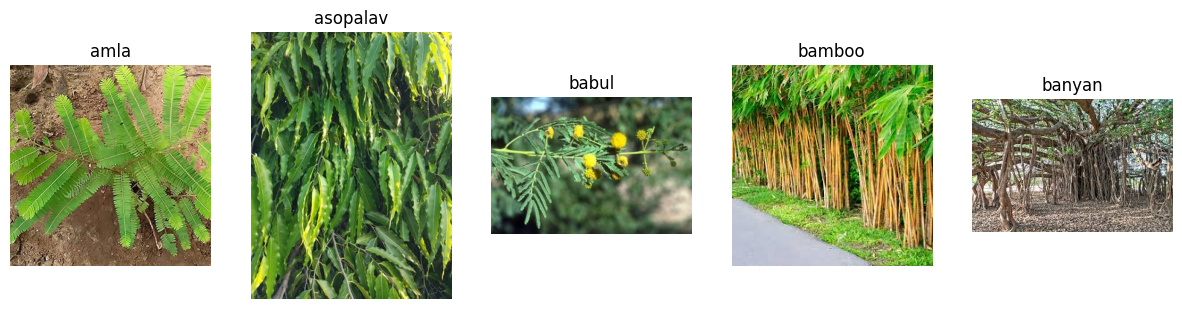

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_sample_images(data_dir, class_list, n=5):
    plt.figure(figsize=(15, 10))
    image_classes = [c for c in class_list if c != '.git'] # Exclude .git folder
    for i, class_name in enumerate(image_classes[:n]):
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            img_files = os.listdir(class_folder)
            if img_files: # Check if the folder is not empty
                img_path = os.path.join(class_folder, img_files[0])
                img = Image.open(img_path)
                plt.subplot(1, n, i+1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
    plt.show()

show_sample_images(data_dir, class_counts)

In [18]:
image_shapes = []

for class_name in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = Image.open(img_path)
                image_shapes.append(img.size)
            except UnidentifiedImageError:
                print(f"Could not identify image file: {img_path}")


# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,1000,1000
1,1000,667
2,750,585
3,839,921
4,275,183


In [19]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [20]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_name in class_counts:
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            if os.path.isfile(img_path): # Check if it's a file before opening
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [21]:

corrupt_images = []

for class_count in class_counts:
    for img_file in os.listdir(os.path.join(data_dir, class_count)):
        img_path = os.path.join(data_dir, class_count, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


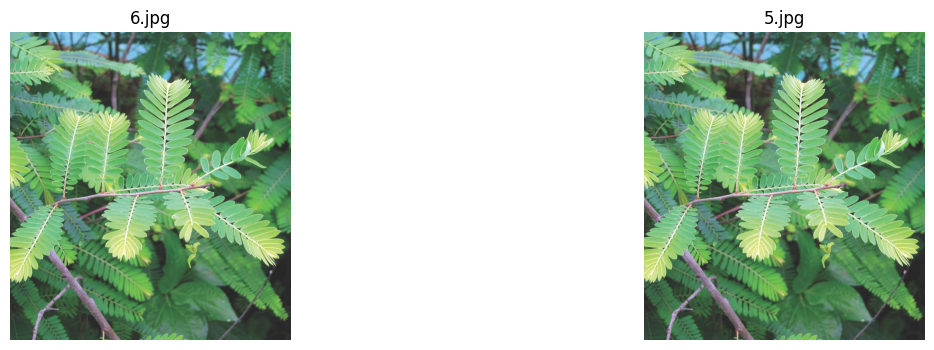

Duplicate set 2:


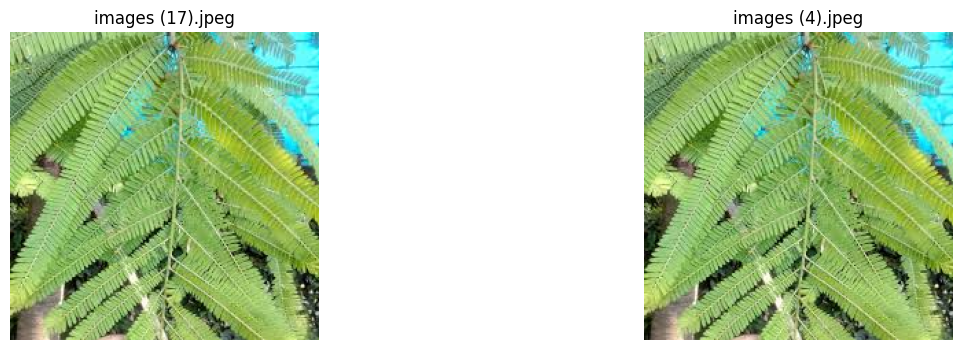

Duplicate set 3:


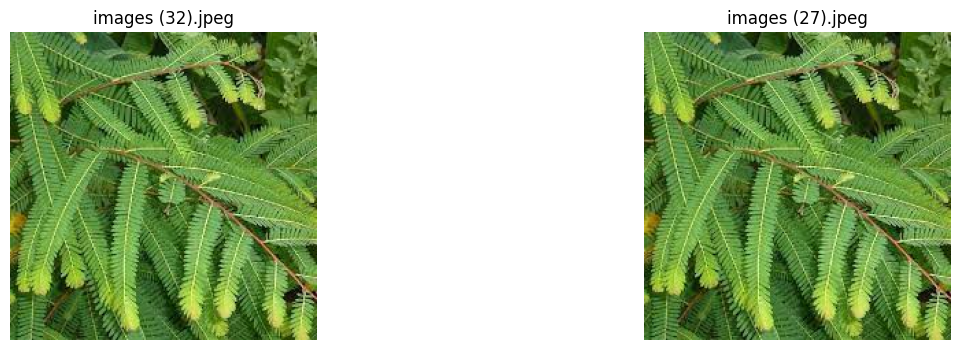

In [22]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [23]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [24]:
hashes = defaultdict(list)

for class_name in class_count:
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            if os.path.isfile(img_path): # Check if it's a file before opening
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate Remaining:", len(duplicates))

Duplicate Remaining: 0


In [25]:
from PIL import Image
import pandas as pd
import os

# Gather image info
image_info = []

for class_name in class_counts.keys(): # Iterate through the keys of the class_counts dictionary
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path) and class_name != '.git':
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_info.append({
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'class': class_name
                    })
            except Exception as e:
                print(f"Could not process image file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


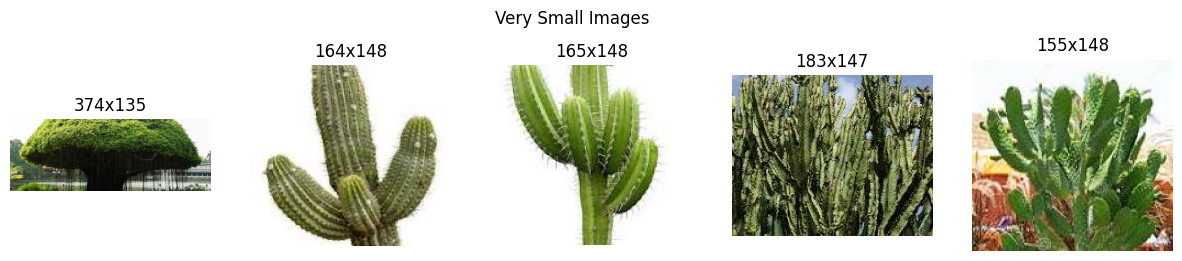

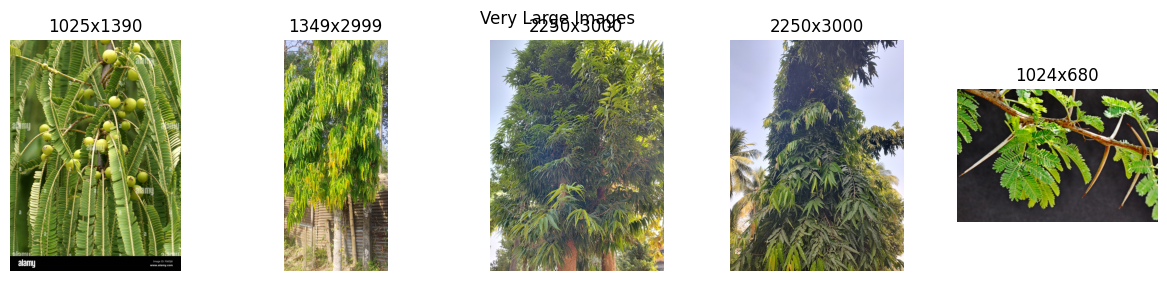

In [26]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [27]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [28]:
# Recalculate sizes
image_info = []

for class_name in class_counts.keys(): # Iterate through the keys of the class_counts dictionary
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path) and class_name != '.git':
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_info.append({
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'class': class_name
                    })
            except Exception as e:
                # It's good practice to print the error for debugging
                print(f"Could not process image file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [30]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.0584 - loss: 3.4578 - val_accuracy: 0.0903 - val_loss: 3.3999
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 637ms/step - accuracy: 0.0544 - loss: 3.4360 - val_accuracy: 0.0903 - val_loss: 3.3859
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 641ms/step - accuracy: 0.0916 - loss: 3.4135 - val_accuracy: 0.0903 - val_loss: 3.3912
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 607ms/step - accuracy: 0.0809 - loss: 3.4059 - val_accuracy: 0.0903 - val_loss: 3.3830
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 640ms/step - accuracy: 0.0841 - loss: 3.4098 - val_accuracy: 0.0903 - val_loss: 3.3874
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 641ms/step - accuracy: 0.0819 - loss: 3.4043 - val_accuracy: 0.0903 - val_loss: 3.3858
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 630ms/step - accuracy: 0.0731 - loss: 3.3954 - val_accuracy: 0.0903 - val_loss: 3.3740
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 627ms/step - accuracy: 0.1006 - loss: 3.3649 - val_accurac

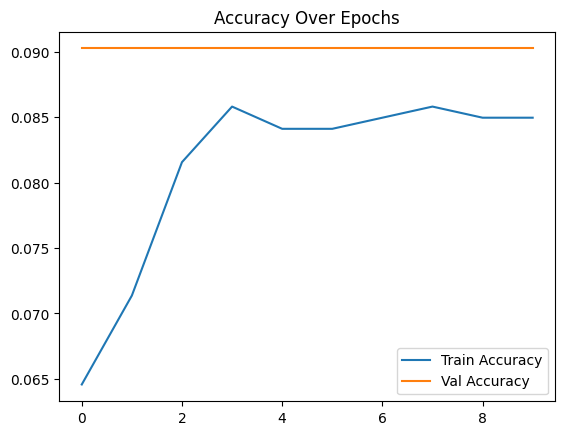

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 45s 967ms/step - accuracy: 0.0615 - loss: 3.7892 - val_accuracy: 0.0903 - val_loss: 3.3034
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 760ms/step - accuracy: 0.0868 - loss: 3.2821 - val_accuracy: 0.1011 - val_loss: 3.2194
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 746ms/step - accuracy: 0.1008 - loss: 3.1779 - val_accuracy: 0.1552 - val_loss: 2.9916
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 753ms/step - accuracy: 0.1427 - loss: 3.0218 - val_accuracy: 0.1986 - val_loss: 2.8624
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 752ms/step - accuracy: 0.1953 - loss: 2.8680 - val_accuracy: 0.2022 - val_loss: 2.7618
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 758ms/step - accuracy: 0.2166 - loss: 2.7956 - val_accuracy: 0.2671 - val_loss: 2.6180
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 761ms/step - accuracy: 0.2147 - loss: 2.7298 - val_accuracy: 0.3032 - val_loss: 2.5416
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 753ms/step - accuracy: 0.2553 - loss: 2.5991 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


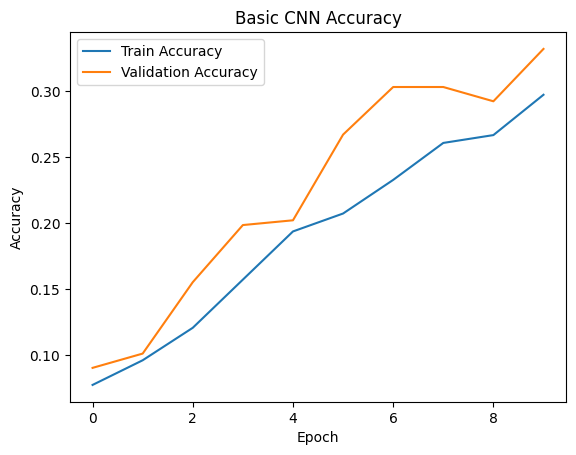

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Found 1454 images belonging to 31 classes.
Found 277 images belonging to 31 classes.
Training class indices: {'.git': 0, 'amla': 1, 'asopalav': 2, 'babul': 3, 'bamboo': 4, 'banyan': 5, 'bili': 6, 'cactus': 7, 'champa': 8, 'coconut': 9, 'garmalo': 10, 'gulmohor': 11, 'gunda': 12, 'jamun': 13, 'kanchan': 14, 'kesudo': 15, 'khajur': 16, 'mango': 17, 'motichanoti': 18, 'neem': 19, 'nilgiri': 20, 'other': 21, 'pilikaren': 22, 'pipal': 23, 'saptaparni': 24, 'shirish': 25, 'simlo': 26, 'sitafal': 27, 'sonmahor': 28, 'sugarcane': 29, 'vad': 30}
Validation class indices: {'.git': 0, 'amla': 1, 'asopalav': 2, 'babul': 3, 'bamboo': 4, 'banyan': 5, 'bili': 6, 'cactus': 7, 'champa': 8, 'coconut': 9, 'garmalo': 10, 'gulmohor': 11, 'gunda': 12, 'jamun': 13, 'kanchan': 14, 'kesudo': 15, 'khajur': 16, 'mango': 17, 'motichanoti': 18, 'neem': 19, 'nilgiri': 20, 'other': 21, 'pilikaren': 22, 'pipal': 23, 'saptaparni': 24, 'shirish': 25, 'simlo': 26, 'sitafal': 27, 'sonmahor': 28, 'sugarcane': 29, 'vad': 3

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 93s 803ms/step - accuracy: 0.1958 - loss: 17.3427 - val_accuracy: 0.5957 - val_loss: 12.6650 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 566ms/step - accuracy: 0.5374 - loss: 11.8775 - val_accuracy: 0.7617 - val_loss: 9.0068 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 544ms/step - accuracy: 0.6250 - loss: 8.6796 - val_accuracy: 0.8339 - val_loss: 6.5393 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 540ms/step - accuracy: 0.6388 - loss: 6.4957 - val_accuracy: 0.8484 - val_loss: 4.8513 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 551ms/step - accuracy: 0.6945 - loss: 4.8445 - val_accuracy: 0.8556 - val_loss: 3.6917 - learning_rate: 0.0010
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 551ms/step - accuracy: 0.6987 - loss: 3.9247 - val_accuracy: 0.8412 - val_loss: 2.9498 - learning_rate: 0.0010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 558ms/step - accuracy: 0.7312 - loss:

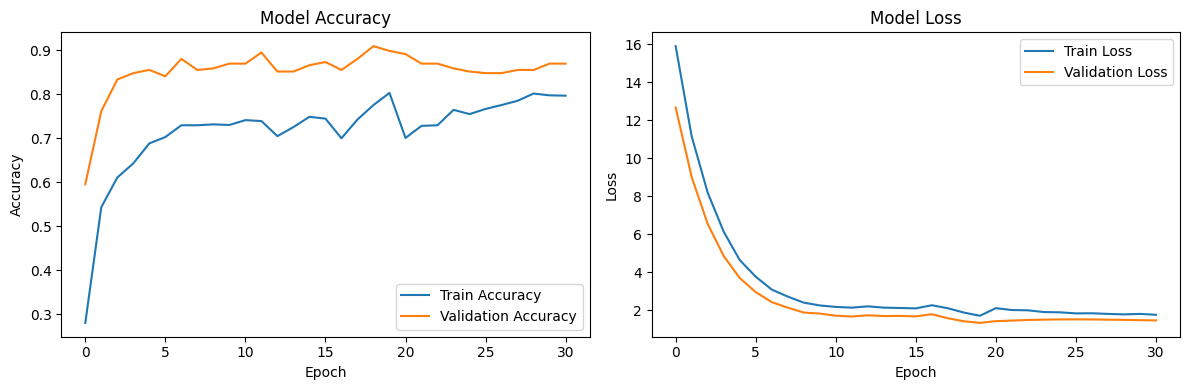

In [39]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

# Define image properties (unchanged)
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Moderate augmentation to preserve tree species features
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9, 1.1]
)

datagen_val = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen_train.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen_val.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Verify class indices
print("Training class indices:", train_generator.class_indices)
print("Validation class indices:", val_generator.class_indices)
print(f"Training samples: {train_generator.samples}, Validation samples: {val_generator.samples}")

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Build MobileNetV2 model
base_model = MobileNetV2(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')

# Stage 1: Train with frozen layers
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    Dropout(0.6),
    Dense(31, activation='softmax')  # For 31 classes
])

# Compile model for stage 1
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Stage 1: Train with frozen layers
print("Stage 1: Training with frozen MobileNetV2 layers")
history_stage1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping]
)

# Stage 2: Fine-tune by unfreezing last 20 layers
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile with lower learning rate
optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Stage 2: Fine-tune
print("Stage 2: Fine-tuning with last 20 layers unfrozen")
history_stage2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping]
)

# Combine histories for plotting
history = {
    'accuracy': history_stage1.history['accuracy'] + history_stage2.history['accuracy'],
    'val_accuracy': history_stage1.history['val_accuracy'] + history_stage2.history['val_accuracy'],
    'loss': history_stage1.history['loss'] + history_stage2.history['loss'],
    'val_loss': history_stage1.history['val_loss'] + history_stage2.history['val_loss']
}

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save("improved_cnn_model.h5")


In [45]:
def predict_multiple_images(folder_path):
    predictions = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
            image_path = os.path.join(folder_path, filename)
            predicted_class, confidence = predict_tree_species(image_path)
            predictions.append({
                'image': filename,
                'predicted_class': predicted_class,
                'confidence': confidence
            })
    return predictions

# Example usage
test_folder = '/content/drive/MyDrive/Datasets/extracted_data/Tree_Species_Dataset/pipal'  # Replace with your test folder path
results = predict_multiple_images(test_folder)
for result in results:
    print(f"Image: {result['image']}")
    print(f"Predicted Tree Species: {result['predicted_class']}")
    print(f"Confidence: {result['confidence']:.2f}%")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━